<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [11]:
def sum_prod(X, V):
    result = 0
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

def test_sum_prod():
    matrix1 = np.array([[1, 2], [3, 4]])
    matrix2 = np.array([[5, 6], [7, 8]])
    vector1 = np.array([[1], [1]])
    vector2 = np.array([[3], [4]])

    matrices = [matrix1, matrix2]
    vectors = [vector1, vector2]

    expected_result = np.array([[42], [60]])

test_sum_prod()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [12]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

def test_binarize():
    M = np.array([[0.3, 0.5, 0.7], [0.1, 0.6, 0.8]])
    expected_result = np.array([[0, 0, 1], [0, 1, 1]])
    assert np.array_equal(binarize(M), expected_result)

    M = np.array([[0.3, 0.5, 0.7], [0.1, 0.6, 0.8]])
    expected_result = np.array([[0, 1, 1], [0, 1, 1]])
    assert np.array_equal(binarize(M, 0.4), expected_result)

test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [13]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

def test_unique_rows_columns():
    mat = np.array([[1, 2, 2], [3, 3, 3], [4, 5, 5]])

    expected_result_rows = [np.array([1, 2]), np.array([3]), np.array([4, 5])]
    result_rows = unique_rows(mat)
    for result, expected in zip(result_rows, expected_result_rows):
        assert np.array_equal(result, expected)

    expected_result_columns = [np.array([1, 3, 4]), np.array([2, 3, 5]), np.array([2, 3, 5])]
    result_columns = unique_columns(mat)
    for result, expected in zip(result_columns, expected_result_columns):
        assert np.array_equal(result, expected)

test_unique_rows_columns()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

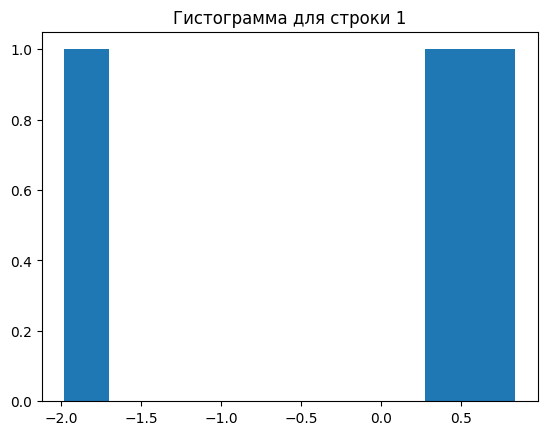

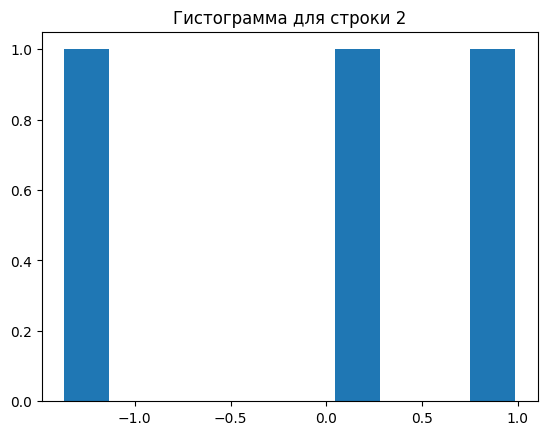

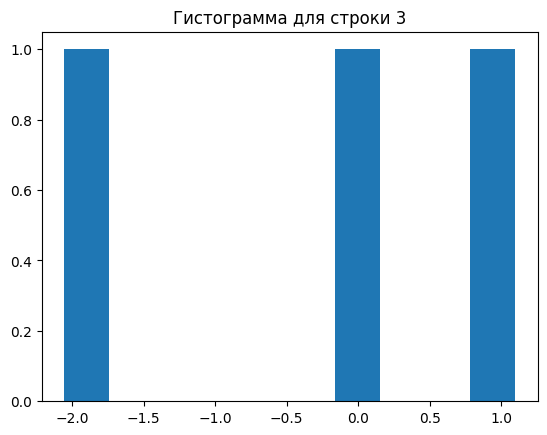

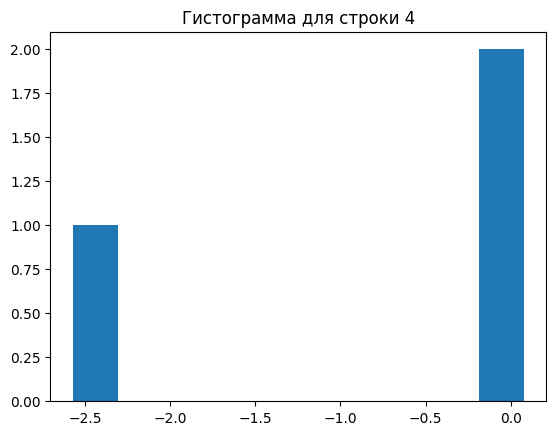

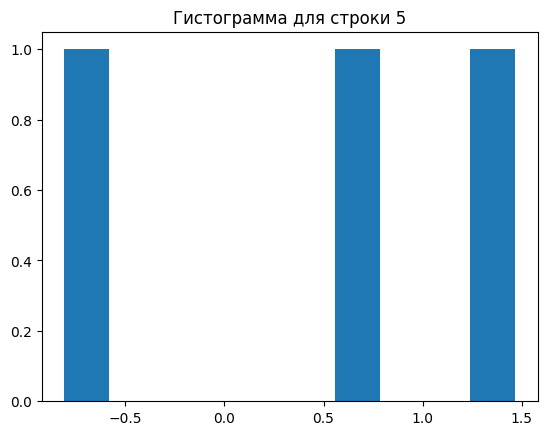

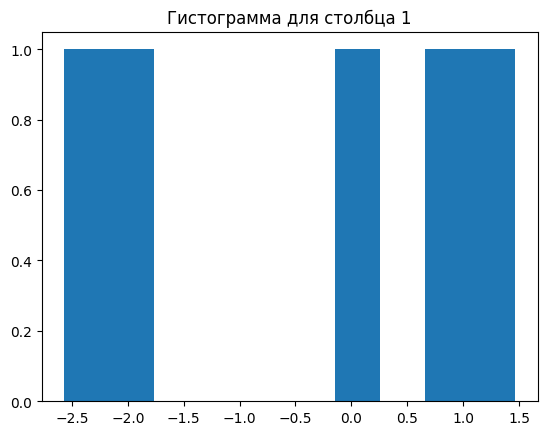

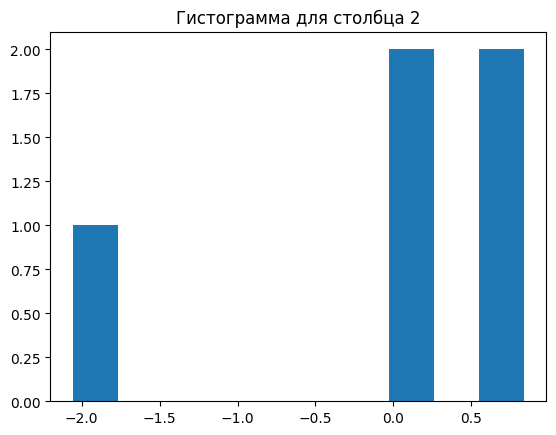

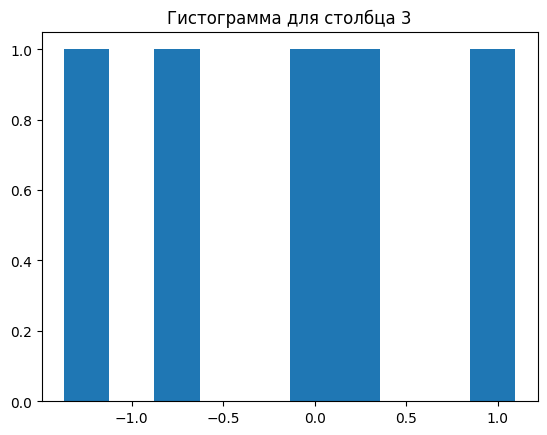

Row means: [-0.91456603  0.20717262 -0.32952146  0.4861965  -0.37028077]
Row variances: [0.28448959 0.43176021 0.2442455  1.26247892 2.4897373 ]
Column means: [ 0.57003791 -0.36484976 -0.72604918 -0.21593828]
Column variances: [1.4231225  1.62073687 0.29879822 0.48482094]


In [24]:
def generate_and_analyze(m, n):
    mat = np.random.normal(size=(m, n))

    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)

    for i, row in enumerate(mat):
        plt.hist(row)
        plt.title(f"Гистограмма для строки {i+1}")
        plt.show()
    
    for j in range(n):
        col = mat[:, j]
        plt.hist(col)
        plt.title(f"Гистограмма для столбца {j+1}")
        plt.show()

    return row_means, row_vars, col_means, col_vars

generate_and_analyze(5, 3)
print('Row means:', row_means)
print('Row variances:', row_vars)
print('Column means:', col_means)
print('Column variances:', col_vars)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [25]:
def chess(m, n, a, b):
    base = np.array([[a, b], [b, a]])
    return np.tile(base, (m // 2 + m % 2, n // 2 + n % 2))[:m, :n]

def test_chess():
    expected_result = np.array([[1, 2], [2, 1]])
    assert np.array_equal(chess(2, 2, 1, 2), expected_result)

    expected_result = np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
    assert np.array_equal(chess(3, 3, 1, 2), expected_result)

    expected_result = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]])
    assert np.array_equal(chess(4, 4, 1, 0), expected_result)

test_chess()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

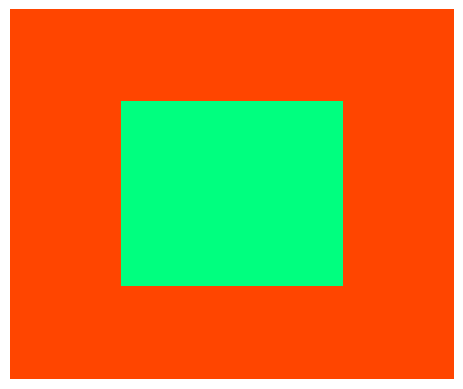

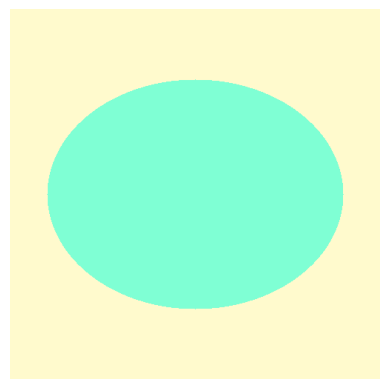

In [38]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)

    start_row = (m - a) // 2
    end_row = start_row + a
    start_col = (n - b) // 2
    end_col = start_col + b
    image[start_row:end_row, start_col:end_col] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)

    x0 = m // 2
    y0 = n // 2
    x, y = np.meshgrid(np.arange(m), np.arange(n))

    distances = ((x - x0) / a) ** 2 + ((y - y0) / b) ** 2
    image[distances <= 1] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

draw_rectangle(50,60,100,120,(0, 255, 127),(255, 69, 0))
draw_ellipse(200, 155, 500, 500, (127, 255, 212), (255, 250, 205))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [41]:
def analyze_time_series(series, p):
    mean = np.mean(series)
    print(f'Calculated mean: {mean}')
    variance = np.var(series)
    std_dev = np.std(series)

    local_maxima = [i for i in range(1, len(series)-1) if series[i] > series[i-1] and series[i] > series[i+1]]
    local_minima = [i for i in range(1, len(series)-1) if series[i] < series[i-1] and series[i] < series[i+1]]
    window = np.ones(p) / p
    moving_average = np.convolve(series, window, 'valid')

    return mean, variance, std_dev, local_maxima, local_minima, moving_average

mean, variance, std_dev, local_maxima, local_minima, moving_average = analyze_time_series([5, 8, 7, 1, 4, 4, 9, 6, 11, 1],2)
print('mean:',mean)
print('variance:',variance)
print('std_dev:',std_dev)
print('varlocal_maximaiance:',local_maxima)
print('local_minima:',local_minima)
print('moving_average:',moving_average)

Calculated mean: 5.6
mean: 5.6
variance: 9.64
std_dev: 3.104834939252005
varlocal_maximaiance: [1, 6, 8]
local_minima: [3, 7]
moving_average: [6.5 7.5 4.  2.5 4.  6.5 7.5 8.5 6. ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [48]:
def one_hot_encode(labels):
    n_classes = np.max(labels) + 1
    return np.eye(n_classes)[labels]

one_hot_encode([0, 2, 3, 0])

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])